# Quaternion Visualization in Theoretical Mechanics

In [ ]:
print('Installing the necessary packages, may take some time...')
!sudo apt update > /dev/null 2>&1
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev > /dev/null 2>&1
!pip install manim > /dev/null 2>&1
!pip install IPython==8.21.0 > /dev/null 2>&1
print('Done!')

Installing the necessary packages, may take some time...
Done!


## Importing Necessary Libraries and Implementing video rendering
_Just run this cell and don't pay attention, the most interesting part is below!_

In [ ]:
import numpy as np
from manim import *
config.media_embed = True

def generate_rotation_code(phi: int, v: list):

  render_code = f'''%%manim -pql -v WARNING QuaternionRotationDirect

class QuaternionRotationDirect(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=60 * DEGREES, theta=45 * DEGREES)
        rotating_obj = Cube(side_length=1, fill_opacity=0.7).set_color([BLUE, YELLOW, ORANGE])

        axes_static = ThreeDAxes()
        self.add(axes_static)

        basis_vectors = ThreeDAxes(
            x_length=3.5,
            y_length=3.5,
            z_length=3.5
        )
        basis_vectors.x_axis.set_color(BLUE)
        basis_vectors.y_axis.set_color(RED)
        basis_vectors.z_axis.set_color(GREEN)
        self.add(rotating_obj, basis_vectors)

        v = {v}
        phi = {phi} / 180 * PI

        passive_text = MathTex(r"\\text{{Passive transformation}}")
        passive_text.to_corner(UP)

        latex_text = MathTex(r"\\Lambda = cos(\\frac{{\\phi}}{{2}}) + \\frac{{\\vec{{v}}}}{{|\\vec{{v}}|}}*sin(\\frac{{\\phi}}{{2}})")
        latex_text.to_corner(DOWN)

        user_data = MathTex(
            r"\\phi = {phi}°, \quad \\vec{{v}} = \\begin{{bmatrix}} {v[0]:.3f} \\\ {v[1]:.3f} \\\ {v[2]:.3f} \\end{{bmatrix}}",
            font_size=36
        )
        user_data.to_corner(LEFT)

        self.add_fixed_in_frame_mobjects(passive_text)
        self.add_fixed_in_frame_mobjects(latex_text)
        self.add_fixed_in_frame_mobjects(user_data)

        # Анимация появления текста
        self.play(Write(latex_text), Write(passive_text), Write(user_data))
        self.wait(1)

        self.play(
            Rotate(rotating_obj, angle=phi, axis=v, about_point=ORIGIN),
            Rotate(basis_vectors, angle=phi, axis=v, about_point=ORIGIN),
            run_time=3,
        )

        # Поворот обратно в исходное состояние
        self.play(
            Rotate(rotating_obj, angle=-phi, axis=v, about_point=ORIGIN),
            Rotate(basis_vectors, angle=-phi, axis=v, about_point=ORIGIN),
            run_time=3,
        )

        active_text = MathTex(r"\\text{{Active transformation}}")
        active_text.to_corner(UP)
        self.play(Transform(passive_text, active_text))
        self.wait(2)

        # Поворот в активной точке зрения (вращаем неподвижные оси)
        self.play(Rotate(axes_static, angle=-phi, axis=v, about_point=ORIGIN), run_time=3)

        # Обратный поворот в активной точке зрения
        self.play(Rotate(axes_static, angle=phi, axis=v, about_point=ORIGIN), run_time=3)

  '''
  return render_code


def generate_rotation_composition(phi: int, v: list, psi: int, u: list):

    render_code = f'''%%manim -pql -v WARNING ParallelRotation

class ParallelRotation(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70 * DEGREES, theta=45 * DEGREES)

        dividing_line = Line(UP, DOWN, color=WHITE)  #
        self.add_fixed_in_frame_mobjects(dividing_line)
        dividing_line.set_length(config.frame_width)

        left_cube = Cube().scale(0.8).move_to(UP * 2  + LEFT * 2).set_color([RED, YELLOW])  # Перемещаем куб в левую часть
        left_axes = ThreeDAxes(x_range=[-1.5, 1.5], y_range=[-1.5, 1.5], z_range=[-1.5, 1.5]).scale(0.7).move_to(UP * 2 + LEFT * 2)

        right_cube = Cube().scale(0.8).move_to(DOWN * 2 + RIGHT * 2).set_color([BLUE, YELLOW])  # Перемещаем куб в правую часть
        right_axes = ThreeDAxes(x_range=[-1.5, 1.5], y_range=[-1.5, 1.5], z_range=[-1.5, 1.5]).scale(0.7).move_to(DOWN * 2 + RIGHT * 2)

        # left_cube.rotate(-13 * DEGREES, axis=OUT)
        # left_cube.rotate(3 * DEGREES, axis=UP)


        self.add(left_cube, left_axes)
        self.add(right_cube, right_axes)

        left_text = MathTex(r"\\text{{Rotation}} \\: \\Lambda \\circ M")
        left_text.to_corner(UP + 5 * LEFT)

        right_text = MathTex(r"\\text{{Rotation}} \\; M \\circ \\Lambda")
        right_text.to_corner(UP + 5 * RIGHT)


        self.add_fixed_in_frame_mobjects(left_text)
        self.add_fixed_in_frame_mobjects(right_text)

        self.play(Write(left_text), Write(right_text), GrowFromCenter(dividing_line))
        self.wait(1)

        first_rotate_text = MathTex(r"\\phi = {phi}\\text{{°}}, \\quad \\vec{{v}} = \\begin{{bmatrix}} {v[0]:.3f} \\\ {v[1]:.3f} \\\ {v[2]:.3f} \\end{{bmatrix}}")
        first_rotate_text.to_corner(DOWN + 2 * LEFT)
        second_rotate_text = MathTex(r"\\psi = {psi}\\text{{°}}, \\quad \\vec{{u}} = \\begin{{bmatrix}} {u[0]:.3f} \\\ {u[1]:.3f} \\\ {u[2]:.3f} \\end{{bmatrix}}")
        second_rotate_text.to_corner(DOWN + 2 * RIGHT)

        self.add_fixed_in_frame_mobjects(first_rotate_text)
        self.add_fixed_in_frame_mobjects(second_rotate_text)

        def add_arrow_with_label(cube, vector, color):

            arrow = Arrow(
                start=cube.get_center(),
                end=cube.get_center() + np.array(vector) / np.linalg.norm(vector) * 2,
                color=color,
                buff=0,
                stroke_width=6
            )
            return arrow

        left_arrow1 = add_arrow_with_label(left_cube, {u}, BLUE)
        right_arrow1 = add_arrow_with_label(right_cube, {v}, RED)
        self.play(
            Write(first_rotate_text),
            Write(second_rotate_text),
        )
        self.wait(1)

        self.play(
            GrowArrow(left_arrow1),
            GrowArrow(right_arrow1)
        )


        self.play(
            Rotate(left_cube, angle={psi * PI / 180}, axis={u}, about_point=left_cube.get_center()),
            Rotate(right_cube, angle={phi * PI / 180}, axis={v}, about_point=right_cube.get_center()),
            run_time=2
        )
        self.play(FadeOut(left_arrow1), FadeOut(right_arrow1))

        first_rotate_text.to_corner(DOWN + 2 * RIGHT)
        second_rotate_text.to_corner(DOWN + 2 * LEFT)

        self.play(
            Transform(first_rotate_text, second_rotate_text),
            Transform(second_rotate_text, first_rotate_text)
        )

        left_arrow2 = add_arrow_with_label(left_cube, {v}, BLUE)
        right_arrow2 = add_arrow_with_label(right_cube, {u}, RED)

        self.play(
            GrowArrow(left_arrow2),
            GrowArrow(right_arrow2)
        )

        self.play(
            Rotate(left_cube, angle={phi * PI / 180}, axis={v}, about_point=left_cube.get_center()),
            Rotate(right_cube, angle={psi * PI / 180}, axis={u}, about_point=right_cube.get_center()),
            run_time=2
        )
        self.play(FadeOut(left_arrow2), FadeOut(right_arrow2))

        self.wait(3.5)
'''

    return render_code


## __Part I.__ Passive and Active Transformations
Feel free to explore it, use widgets below to configure the rotation.

In [ ]:
from IPython import get_ipython
from IPython.display import display, clear_output
import ipywidgets as widgets

ipython = get_ipython()


transforms_label = widgets.Label(value="Configure rotation parameters (angle and vector):")
angle_widget = widgets.IntSlider(
    value=180,
    min=0,
    max=360,
    step=1,
    description='Rotation angle (°):',
    continuous_update=True,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='35%')
)

x_coord_widget = widgets.FloatText(
    value=1.0,
    description='X:',
)

y_coord_widget = widgets.FloatText(
    value=0.0,
    description='Y:',
)
z_coord_widget = widgets.FloatText(
    value=0.0,
    description='Z:',
)

apply_button = widgets.Button(
    description='Apply Rotation',
    button_style='success',
)

coords_column = widgets.VBox([x_coord_widget, y_coord_widget, z_coord_widget])
ui = widgets.VBox([transforms_label, angle_widget, coords_column, apply_button])


def on_apply_button_click(b):
    clear_output()
    display(ui)
    angle = angle_widget.value
    vector = [x_coord_widget.value, y_coord_widget.value, z_coord_widget.value]
    render_code =  generate_rotation_code(angle, vector)
    ipython.run_cell(render_code)
    None


apply_button.on_click(on_apply_button_click)
display(ui)

Manim Community v0.18.1

## __Part II.__ Non-commutativity of Quaternions

Illustration that in general case:
 $\quad \Lambda \circ M \neq M \circ \Lambda $

In [ ]:
angle1_label = widgets.Label(value="First Rotation:")
angle1 = widgets.FloatSlider(min=0, max=360, step=1, value=45, description="Angle 1:")
x1 = widgets.FloatText(value=1, description="X1:")
y1 = widgets.FloatText(value=0, description="Y1:")
z1 = widgets.FloatText(value=0, description="Z1:")

angle2_label = widgets.Label(value="Second Rotation:")
angle2 = widgets.FloatSlider(min=0, max=360, step=1, value=45, description="Angle 2:")
x2 = widgets.FloatText(value=0, description="X2:")
y2 = widgets.FloatText(value=1, description="Y2:")
z2 = widgets.FloatText(value=0, description="Z2:")

apply_button = widgets.Button(
    description="Apply Rotations",
    button_style="success",
    )

col1 = widgets.VBox([angle1_label, angle1, x1, y1, z1])
col2 = widgets.VBox([angle2_label, angle2, x2, y2, z2])

cols = widgets.HBox([col1, col2])

def apply_rotations(b):
    clear_output()
    display(cols, apply_button)
    phi = angle1.value
    psi = angle2.value
    v = [x1.value, y1.value, z1.value]
    u = [x2.value, y2.value, z2.value]
    render_code =  generate_rotation_composition(phi, v, psi, u)
    ipython.run_cell(render_code)
    None

apply_button.on_click(apply_rotations)
display(cols, apply_button)


Button(button_style='success', description='Apply Rotations', style=ButtonStyle())

Manim Community v0.18.1

## __Part III.__ Integration of Poisson Equation

Numerical integration of Poisson equations with an initial condition and a law of change of angular velocity

$\dot{\Lambda}(t) = \frac{1}{2} w(t) * \Lambda(t)$

FloatText(value=0.0, description='λ1:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='λ2:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='λ3:', style=DescriptionStyle(description_width='initial'))

Text(value='sin(t)', description='Omega X(t):', style=DescriptionStyle(description_width='initial'))

Text(value='cos(t)', description='Omega Y(t):', style=DescriptionStyle(description_width='initial'))

Text(value='t', description='Omega Z(t):', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Start time (t=0):', style=DescriptionStyle(description_width='initial'))

FloatText(value=10.0, description='End time:', style=DescriptionStyle(description_width='initial'))

IntSlider(value=100, description='Steps:', max=1000, min=10, step=10)

Button(button_style='success', description='Calculate', style=ButtonStyle())

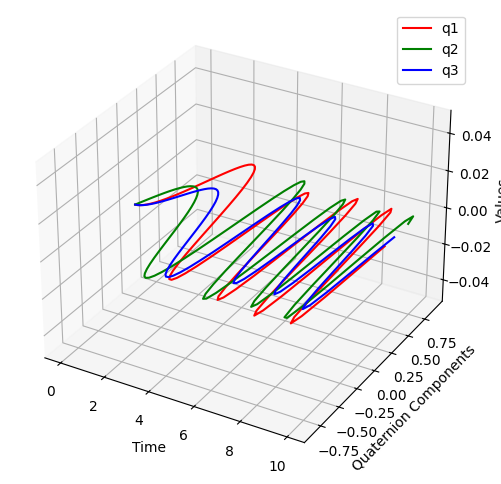

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp

def initial_quaternion(x0, y0, z0):
    return np.array([1.0, x0, y0, z0])

def parse_omega_expression(expr_str):
    t = sp.symbols('t')
    expr = sp.sympify(expr_str)
    func = sp.lambdify(t, expr, "numpy")
    return func

def quaternion_derivative(q, t, omega_func_x, omega_func_y, omega_func_z):
    q0, q1, q2, q3 = q
    wx = omega_func_x(t)
    wy = omega_func_y(t)
    wz = omega_func_z(t)
    q_dot = 0.5 * np.array([
        -q1*wx - q2*wy - q3*wz,
         q0*wx + q2*wz - q3*wy,
         q0*wy - q1*wz + q3*wx,
         q0*wz + q1*wy - q2*wx
    ])
    return q_dot

def solve_poisson_quaternion(omega_func_x, omega_func_y, omega_func_z, q0_init, t_range):
    q_solution = odeint(quaternion_derivative, q0_init, t_range, args=(omega_func_x, omega_func_y, omega_func_z))
    return t_range, q_solution

x_coord_widget = widgets.FloatText(value=0.0, description="λ1:", style={'description_width': 'initial'})
y_coord_widget = widgets.FloatText(value=0.0, description="λ2:", style={'description_width': 'initial'})
z_coord_widget = widgets.FloatText(value=0.0, description="λ3:", style={'description_width': 'initial'})

omega_x_expr_widget = widgets.Text(value="sin(t)", description="Omega X(t):", style={'description_width': 'initial'})
omega_y_expr_widget = widgets.Text(value="cos(t)", description="Omega Y(t):", style={'description_width': 'initial'})
omega_z_expr_widget = widgets.Text(value="t", description="Omega Z(t):", style={'description_width': 'initial'})

start_time_widget = widgets.FloatText(value=0.0, description="Start time (t=0):", style={'description_width': 'initial'})
end_time_widget = widgets.FloatText(value=10.0, description="End time:", style={'description_width': 'initial'})
steps_widget = widgets.IntSlider(value=100, min=10, max=1000, step=10, description="Steps:")

apply_button = widgets.Button(description="Calculate", button_style="success")

def on_button_click(b):
    x0 = x_coord_widget.value
    y0 = y_coord_widget.value
    z0 = z_coord_widget.value

    omega_x_expr = omega_x_expr_widget.value
    omega_y_expr = omega_y_expr_widget.value
    omega_z_expr = omega_z_expr_widget.value

    omega_func_x = parse_omega_expression(omega_x_expr)
    omega_func_y = parse_omega_expression(omega_y_expr)
    omega_func_z = parse_omega_expression(omega_z_expr)

    t_start = start_time_widget.value
    t_end = end_time_widget.value
    steps = steps_widget.value
    q0_init = initial_quaternion(x0, y0, z0)

    t_range = np.linspace(t_start, t_end, steps)

    t, q_solution = solve_poisson_quaternion(omega_func_x, omega_func_y, omega_func_z, q0_init, t_range)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(t, q_solution[:, 1], label="q1", color='r')
    ax.plot(t, q_solution[:, 2], label="q2", color='g')
    ax.plot(t, q_solution[:, 3], label="q3", color='b')
    ax.set_xlabel('Time')
    ax.set_ylabel('Quaternion Components')
    ax.set_zlabel('Values')
    ax.legend()
    plt.show()

apply_button.on_click(on_button_click)

display(
    x_coord_widget, y_coord_widget, z_coord_widget,
    omega_x_expr_widget, omega_y_expr_widget, omega_z_expr_widget,
    start_time_widget, end_time_widget, steps_widget,
    apply_button
)
